<a href="https://colab.research.google.com/github/ryanleeallred/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module3-introduction-to-bayesian-inference/LS_DS_133_Introduction_to_Bayesian_Inference_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science Module 133

## Introduction to Bayesian Inference




## Assignment - Code it up!

Most of the above was pure math - now write Python code to reproduce the results! This is purposefully open ended - you'll have to think about how you should represent probabilities and events. You can and should look things up, and as a stretch goal - refactor your code into helpful reusable functions!

Specific goals/targets:

1. Write a function `def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk)` that reproduces the example from lecture, and use it to calculate and visualize a range of situations
2. Explore `scipy.stats.bayes_mvs` - read its documentation, and experiment with it on data you've tested in other ways earlier this week
3. Create a visualization comparing the results of a Bayesian approach to a traditional/frequentist approach
4. In your own words, summarize the difference between Bayesian and Frequentist statistics

If you're unsure where to start, check out [this blog post of Bayes theorem with Python](https://dataconomy.com/2015/02/introduction-to-bayes-theorem-with-python/) - you could and should create something similar!

Stretch goals:

- Apply a Bayesian technique to a problem you previously worked (in an assignment or project work) on from a frequentist (standard) perspective
- Check out [PyMC3](https://docs.pymc.io/) (note this goes beyond hypothesis tests into modeling) - read the guides and work through some examples
- Take PyMC3 further - see if you can build something with it!

In [1]:
import pandas as pd
import collections
import pprint
from scipy import stats as stats
from itertools import combinations
from collections import ChainMap
from functools import reduce
import numpy as np

In [2]:
# def bayes_theorem(prior, false_positive, false_negative, num_iterations):
#   probabilities = []
#   for blah in range(num_iterations):
#     posterior_probability = #do the bayes awesomeness
#     probabilities.append(posterior_probability)
#   return probabilities

$$
\begin{aligned}
P(Drunk | Positive) &= \frac{P(Positive) | Drunk) P(Drunk)} {P(Positive)} \\
&= \frac{1 \times 0.001}{0.08} \\
&= 0.0125
\end{aligned}
$$

In [3]:
def prob_drunk_given_positive(prob_drunk_prior, prob_positive, prob_positive_drunk):
    return (prob_positive_drunk*prob_drunk_prior) / (prob_positive)

prob_drunk_given_positive(prob_drunk_prior=1e-3, prob_positive=8e-2,prob_positive_drunk=1 )

0.0125

In [4]:
??stats.bayes_mvs

In [5]:
# returns mean, variance, and standard deviation named tuples calculated for
# the baynessian confidence intervals
# def bayes_mvs(data, alpha):
#     m,v,s = mvsdist(data)
#     if alpha >= 1 or alpha <= 0:
#         raise ValueError("0 < alpha < 1 is required, but alpha=%s was given." % 
#                         alpha)
#     m_res = Mean(m.mean(), m.interval(alpha))
#     v_res = Variance(v.mean(), v.interal(alpha))
#     s_res = Std_dev(s.mean(), s.interval(alpha))
#     return m_res, v_res, s_res

In [6]:
# force map to evaluate and put the result into a list

# f -> [a b] = [f(a) f(b)]
def Map(func, iterable):
    v = []
    
    for thing in map(compose(func), iterable):
        v.append(thing)
    return v

# compose(f) = f
# compose(f, g) = f(g)
# compose([f,g]) # f(g)
def compose(*functions):
    if type(first(functions))==type([]): 
        return reduce(lambda f, g: lambda x: f(g(x)), first(functions), lambda x: x)
    elif len(functions)==1 and type(first(functions))!=type([]):
        return first(functions)
    else: 
        return reduce(lambda f, g: lambda x: f(g(x)), functions, lambda x: x)

# evaluates func (one functions or many) over the iterable
def DoOn(func, iterable):
    return Map(lambda x: compose(func)(x), iterable)
        

# coerce to dict
def Dict(thing):
    result = {}
    topkey = None
    
    # classname needs to be set as the name otherwise
    # not included
    if hasattr(thing, "__class__"):
        topkey = thing.__class__.__name__
    # fix for dataframes
    if hasattr(thing, "to_dict"):
        result = thing.to_dict('records')
    # fix for named tuples
    elif hasattr(thing, "_asdict"):
        result = dict(thing._asdict())
    else:
        result = dict(thing)
    
    if topkey:
        return {topkey: result}
    else:
        return result

def to_dataframe(array_of_dict, one_observation=False):
    fixed = DoOn([flatten, Dict], array_of_dict)
    # this is only one observation, just make a row for a dataframe
    if one_observation:
        fixed = [dict(ChainMap(*fixed))]
    return pd.DataFrame(fixed)

# like dict.items but more general
def Items(thing):
    if type(thing)==type({}):
        return list(zip(thing.keys(), thing.values()))
    else:
        return list(zip(np.arange(len(thing)), thing))

# ywhile : yield while
def ywhile(func, val):
    while True:
        val = compose(func)(val)
        yield val
        if not val:
            break
            
def dec(num):
    return num - 1

def inc(num):
    return num + 1
            
# prior : prior knowledge of probability
# true_pos : true positive probability
def bayes(prior, true_pos, false_pos):
    # new estimate
    return ((true_pos * prior) / (true_pos * prior + false_pos * (1 - prior)))

def rest(thing):
    return thing[1:]

def first(thing):
    return thing[0]

def last(thing):
    return thing[-1]
    
# call function n times, putting the accumulated
# value in the first argument position, that's why it's called cumulative
# Gen : Generate
# L : Lazy
# Generate Cumulative N times, Lazy
def GenNCumulativeL(func,n,*args, **kwargs):
    new_val = first(args)
    for i in ywhile(dec, n):
        new_val = compose(func)(new_val,*rest(args), **kwargs)
        yield new_val
        

# Generate Cumulative N times, Non-Lazy
def GenNCumulative(func,n,*args, **kwargs):
    return list(GenNCumulativeL(func,n,*args, **kwargs))
    
# yield the function called with args and kwargs n times
# Generate N times, Lazy
def GenNL(func, n, *args, **kwargs):
    for i in ywhile(dec, n):
        yield func(*args, **kwargs)
        
# Generate N times, Non-Lazy
def GenN(func, n, *args, **kwargs):
    return list(GenNL(func, n, *args, **kwargs))

def square(x):
    return x*x

In [7]:
GenN(square, 5, 2)

[4, 4, 4, 4, 4]

In [8]:
GenNCumulative([lambda x: x+x,], 5, 2)

[4, 8, 16, 32, 64]

In [9]:
Map( [square, square], [5, 10, 15])

[625, 10000, 50625]

In [10]:
coinflips = np.random.binomial(n=1, p=.5, size=100)
bayesian_results = stats.bayes_mvs(coinflips)
bayesian_results 

(Mean(statistic=0.42, minmax=(0.33763713292148456, 0.5023628670785154)),
 Variance(statistic=0.2511340206185568, minmax=(0.19768680236634642, 0.3161733908770034)),
 Std_dev(statistic=0.4998428440976869, minmax=(0.4446198402752023, 0.5622929760160653)))

In [11]:
def confidence_interval(X):
    std = np.std(X, ddof=1)
    n = len(X)
    standard_error = std / np.sqrt(n)
    t = stats.t.ppf(.95, n - 1)
    margin_of_error = t * standard_error
    return {'Mean' : np.mean(X), 'Lower' : np.mean(X)-margin_of_error, 'Upper' : np.mean(X)+margin_of_error}

CI = confidence_interval(coinflips)
CI

{'Mean': 0.42, 'Lower': 0.33763713292148456, 'Upper': 0.5023628670785154}

In [12]:
DoOn(Dict, bayesian_results)

[{'Mean': {'statistic': 0.42,
   'minmax': (0.33763713292148456, 0.5023628670785154)}},
 {'Variance': {'statistic': 0.2511340206185568,
   'minmax': (0.19768680236634642, 0.3161733908770034)}},
 {'Std_dev': {'statistic': 0.4998428440976869,
   'minmax': (0.4446198402752023, 0.5622929760160653)}}]

In [13]:
[print(Dict(x)) for x in bayesian_results]

{'Mean': {'statistic': 0.42, 'minmax': (0.33763713292148456, 0.5023628670785154)}}
{'Variance': {'statistic': 0.2511340206185568, 'minmax': (0.19768680236634642, 0.3161733908770034)}}
{'Std_dev': {'statistic': 0.4998428440976869, 'minmax': (0.4446198402752023, 0.5622929760160653)}}


[None, None, None]

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

def myplot(df):
    sns.kdeplot(df)
    CI = confidence_interval(df)
    print("CI: ", CI)
    plt.axvline(x=CI["Mean" ], color='red',label ='Right {:.2f}'.format(CI["Mean" ]))
    plt.axvline(x=CI["Lower"], color='red',label ='Left  {:.2f}'.format(CI["Lower"]))
    plt.axvline(x=CI["Upper"], color='k'  ,label ='mean  {:.2f}'.format(CI["Upper"]));
    
    bresults = stats.bayes_mvs(df)
    results = DoOn(Dict, bresults)[0]["Mean"]
    results = {"Mean" : results["statistic"], "Lower": results["minmax"][0],"Upper": results["minmax"][1]}
    print("Baynesian: ", results)
    plt.axvline(x=results["Mean" ], color='green' ,label ='Right {:.2f}'.format(results["Mean" ]))
    plt.axvline(x=results["Lower"], color='green' ,label ='Left  {:.2f}'.format(results["Lower"]))
    plt.axvline(x=results["Upper"], color='purple',label ='mean  {:.2f}'.format(results["Upper"]));
    plt.legend()
    plt.show()
    
    
myplot(coinflips)

CI:  {'Mean': 0.42, 'Lower': 0.33763713292148456, 'Upper': 0.5023628670785154}
Baynesian:  {'Mean': 0.42, 'Lower': 0.33763713292148456, 'Upper': 0.5023628670785154}


<Figure size 640x480 with 1 Axes>

In [15]:
df = pd.read_csv('house-votes-84.data', header=None
                 , names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({"?" : np.nan, "y" : 1, "n" :0})

In [16]:
rep = df[df.party=='republican']

CI:  {'Mean': 0.1, 'Lower': 0.02814781891796017, 'Upper': 0.17185218108203984}
Baynesian:  {'Mean': 0.1, 'Lower': 0.028147818917960143, 'Upper': 0.17185218108203984}


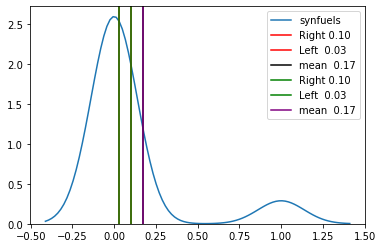

In [17]:
# look at chart I looked at last time
myplot(rep['synfuels'].dropna().sample(n=50))

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/95c6524a3736c43e4bae139713f3df2392e6eda9)

The frequentist statistician is maybe aiming to be right most of the time and is maybe less concerned or thinking less about conditional probabilties that is fundamental to the baynesian approach. The frequentist approach seems like it would rely more on statistics rather than the baynesian process of updating by case and seems mathematically seems built upon the idea of sets.

In [18]:
GenNCumulative(bayes, 5, rep['synfuels'].mean()/rep['synfuels'].sum(), .95, .05)

[0.10734463276836159,
 0.6955684007707129,
 0.9774832549522589,
 0.9987890771695063,
 0.9999361940218644]

In [19]:
GenNCumulative(bayes, 5, 1/1000, .95, .05)

[0.018664047151277015,
 0.26544117647058824,
 0.8728684143547976,
 0.9923926286932684,
 0.999596705499742]

## Resources


- [Worked example of Bayes rule calculation](https://en.wikipedia.org/wiki/Bayes'_theorem#Examples) (helpful as it fully breaks out the denominator)
- [Source code for mvsdist in scipy](https://github.com/scipy/scipy/blob/90534919e139d2a81c24bf08341734ff41a3db12/scipy/stats/morestats.py#L139)